In [2]:
import sympy as sp
import numpy as np

x, y = sp.symbols('x, y')

### 1
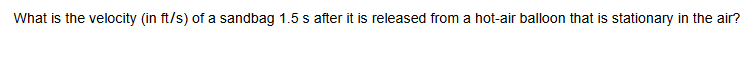

This is a pretty straight forward physics question.
$$ a = v/t \iff v = at$$

In [3]:
a = -32 #ft/s/s ## Annoyingly, matlab defines gravity with -32, instead of +32.174
ti = 1.5 #s
v0 = 0

v = a*ti
v

-48.0

But we care about finding it with calculus.  This involves recognizing that displacement, velocity, and acceleration are all related through integration and derivation:
$$
\frac{d}{dt}[v(t)] = a(t) \iff \int [a(t) dt] = v(t)
$$

In [4]:
C = sp.symbols('C')
expr = -32
indef_integral = sp.integrate(expr,x) + C
this_C = sp.solve(sp.Eq(indef_integral.subs(x, 0), v0), C)[0]
indef_integral.subs(C, this_C).subs(x, ti)

-48.0000000000000

### 2
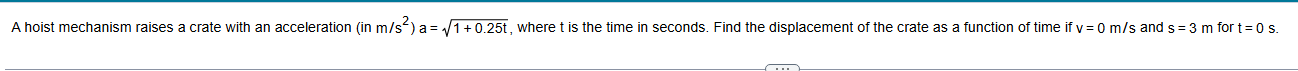

$$ \int \sqrt{1+0.25t} \, dt $$

In [5]:
t = sp.symbols('t')
C = sp.symbols('C')
expr = sp.sqrt(1+sp.Rational(1,4)*t)
expr


sqrt(t/4 + 1)

In [6]:
def get_specific_integral(expr, wrt, reference_point=(0,0)):
    # unpack our reference point 
    xi, yi = reference_point
    # We'll need to use the constant of integration to work with the indefinite integral
    C = sp.symbols('C')
    indefinite_integral = sp.integrate(expr,wrt) + C
    # Anchor the integral to the reference point and solve for C
    anchored_integral = indefinite_integral.subs(wrt, xi)-yi #subtracting y is the same as setting equal to y
    this_C = sp.solve(anchored_integral, C)[0]
    # Substitute back into the indefinite integral to get a specific function
    specific_integral = indefinite_integral.subs(C, this_C)
    return specific_integral

get_specific_integral(expr, t, (0,0))

8*(t/4 + 1)**(3/2)/3 - 8/3

In [7]:
ref = (0,0)
first_integral = get_specific_integral(expr, t, ref)
first_integral

8*(t/4 + 1)**(3/2)/3 - 8/3

In [8]:
ref = (0,3)
second_integral = get_specific_integral(first_integral, t, ref)
second_integral

-8*t/3 + 64*(t/4 + 1)**(5/2)/15 - 19/15

In [9]:

wrt = t
wrt_init = 0
eval_init = 0
indefinite_integral = sp.integrate(expr,t) + C
this_C = sp.solve(sp.Eq(indefinite_integral.subs(wrt, wrt_init), eval_init), C)[0]
specific_integral = indefinite_integral.subs(C, this_C)
specific_integral

8*(t/4 + 1)**(3/2)/3 - 8/3

#### Integration by substitution

$$
\int \left[\textcolor{orange}{f}\bigl(\textcolor{cyan}{g(x)}\bigr) \cdot \frac{d}{dx}\textcolor{cyan}{g(x)} \right] dx 
= \int \textcolor{orange}{f}(\textcolor{red}{u}) \, d\textcolor{red}{u} 
\quad \bigg| \quad 
\begin{cases}
\textcolor{red}{u} = \textcolor{cyan}{g(x)} \\[6pt]
d\textcolor{red}{u} = \frac{d}{dx} \textcolor{cyan}{g(x)} \, dx
\end{cases}
$$

$$
\int \sqrt{1 + 0.25t} \, dt
$$

Let:

$$ 
\begin{align*}
u &= \textcolor{cyan}{1 + 0.25t} \\
\quad &\Rightarrow \quad
\frac{du}{dt} \textcolor{cyan}{(1 + 0.25t)} = \textcolor{cyan}{0.25} \\
\quad &\Rightarrow \quad
dt = \frac{1}{\textcolor{cyan}{0.25}} \, du = 4 \, du
\end{align*}
$$

Now substitute:

$$
\int \sqrt{\textcolor{cyan}{1 + 0.25t}} \, dt 
= \int \sqrt{u} \cdot 4 \, du
= 4 \int u^{1/2} \, du
$$

Use power rule:

$$
= 4 \cdot \frac{u^{3/2}}{3/2} + C
= 4 \cdot \frac{2}{3} u^{3/2} + C
= \frac{8}{3} u^{3/2} + C
$$

Substitute back:

$$
\frac{8}{3} \left(\textcolor{cyan}{1 + 0.25t} \right)^{3/2} + C
$$


### 3
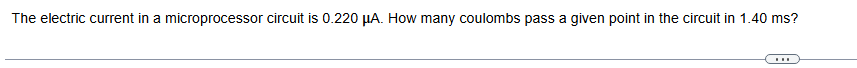

In [10]:
current = .22e-6 # amps, or coloumbs/second
time =  1.4e-3 # seconds
current * time

3.08e-10

In [11]:
# or using calculus
get_specific_integral(current, t, (0,0)).subs(t, time)

3.08000000000000e-10

### 4
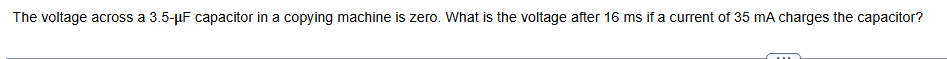

$$
\begin{align*}
1F = 1 \frac{Q}{V} \quad &\to \quad 1V = 1\frac{Q}{F} \\[10pt]
1A = 1\frac{Q}{s} \quad &\to \quad 1Q = 1As \\[10pt]
&\boxed{1V = 1\frac{As}{F}}
\end{align*}
$$

$$
Q = At \quad\to\quad Q = \int_a^b A\, dt

$$
\frac{35mA \cdot 16ms}{3.5\mu F} = 160 V

In [13]:
capacitance = 3.5e-6 #Farads
time = 16e-3
current = 35e-3

charge = current*time
volts = charge/capacitance
volts

160.00000000000003

$$
V_C = \frac{1}{F} \int A\, ds
$$

In [12]:
get_specific_integral(current, t, (0,0)).subs(t, time)/capacitance

160.000000000000

### 5
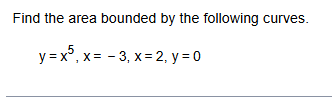

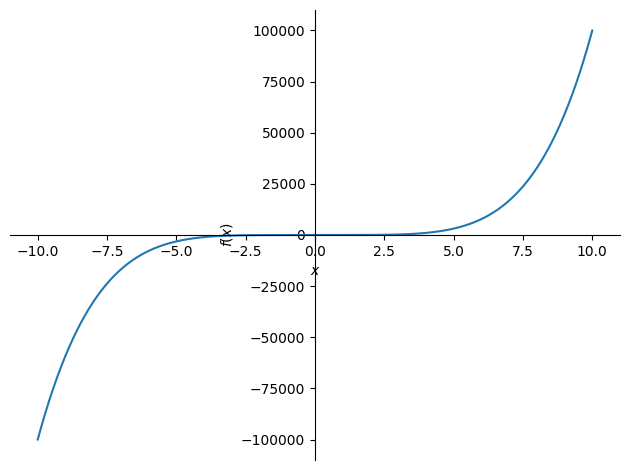

793/6

In [18]:
expr = x**5
sp.plot(expr)
## Integrate the absolute value of x**5
sp.Abs(expr).integrate((x, -3, 2))

In [24]:
# A bit more verbosely
expr = x**5
a, b = -3, 2

switch_point = sp.solve(expr, x)[0]
assert a < switch_point < b

## TODO: This will break down if there is more than one solution.
## A better way would be to concatenate [a, *[solutions], b] and then sum the integrals iteratively
## But the above example is already much cleaner
sp.Abs(expr.integrate((x, a, switch_point))) + sp.Abs(expr.integrate((x, switch_point, b))) 

793/6

### 6
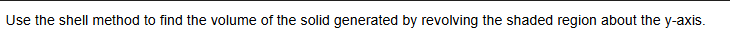  
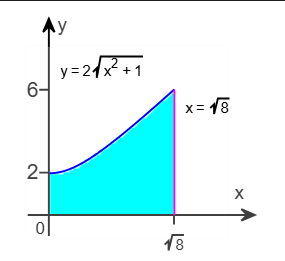

$$ \Large
V = 2\pi \int_a^b x \cdot f(x)\, dx
$$

Circumference of a circle:
$$
\ell = 2 \pi r
$$
Surface area of the walls of a cylinder:
$$
A_s = \ell h
$$
In terms of x:
$$
A_s = 2 \pi x \cdot f(x)
$$

In [33]:
def shell_integration(expr, a, b, wrt=x):
    return sp.integrate(expr*wrt, (wrt, a, b))*sp.pi*2

In [34]:
expr = 2*sp.sqrt(x**2+1)
a, b = 0, sp.sqrt(8)

shell_integration(expr, a, b)

104*pi/3

### 7
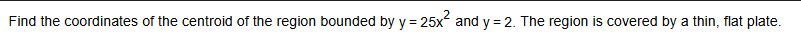

In [57]:
expr1 = 9*x**2
expr2 = 2
difference = expr2 - expr1
wrt = x
# Find where the two expressions intersect
a,b = sp.solve(sp.Eq(expr1,expr2), wrt)

area = sp.integrate(difference, (wrt, a, b))
area

xbar = sp.integrate(wrt*difference, (wrt, a, b))/area
xbar


0

In [58]:
ybar = sp.integrate(expr2**2-expr1**2, (wrt, a, b)) / (2*area)
ybar

6/5

### 8
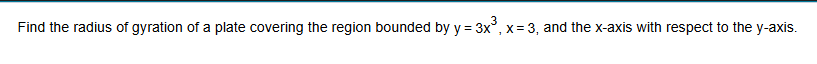

### 9
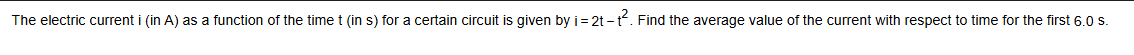

In [71]:
expr = 2*x-x**2
a, b = 0, 6

avg = expr.integrate((x,a,b))/(b-a)
avg

-6

### 10
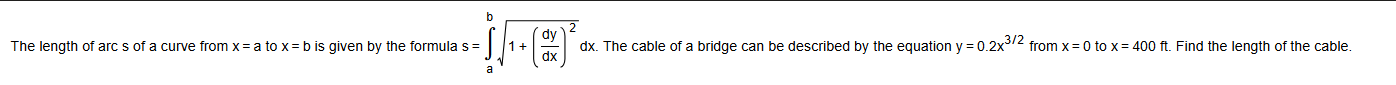  
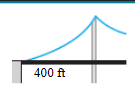

$$ \Large
s = \int_a^b \sqrt{1+\left(\frac{dy}{dx}\right)^2} dx
$$

In [78]:
expr = 0.2*x**sp.Rational(3,2)
a, b = 0, 400
wrt = x

arc_expr= sp.sqrt(1+expr.diff(wrt)**2)
sp.integrate(arc_expr, (wrt, a, b))

1659.72010089655